# Assignment A2 [40 marks]



The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---

# Question 1: Quadrature [16 marks]

In the course, we have seen Newton-Cotes interpolatory quadrature rules, which have the particular property that they use equally-spaced nodes. Other types of quadrature rules also exist.

In this question, we will consider quadrature rules with $N$ nodes, where the nodes $x_k$ are defined as the Chebyshev nodes, i.e.

$$
x_k = \cos\left(\frac{(2k-1)\pi}{2N}\right), \quad
k=1, \dots, N.
$$

**1.1** Write a function `cheb_nodes()` which takes 1 input argument, a strictly positive integer `N`, and returns a NumPy vector of length $N$ containing the $N$ Chebyshev nodes, as defined above.

**[2 marks]**

In [6]:
import numpy as np

def cheb_nodes(N):

    '''
    The function calculates the chebyshev nodes.
    
    Inputs:
    N (float): the number of nodes we will calculate
    
    Returns:
    A numpy vector of length N containing the N chebyshev nodes.

    '''
    # Creates a vector of length N in which we can store our computed nodes.
    x = np.zeros(N)

    # Creates a for loop which will calulate each of the N nodes.
    for k in range(1, N+1):

        # Calculates each node from the given formula.
        x[k - 1] = np.cos(((2 * k - 1) * (np.pi)) / (2 * N))

    return x

**1.2** Write a function `cheb_weights()` which takes 1 input argument, a strictly positive integer `N`, and returns a NumPy vector of length $N$ containing the **weights** $w_k$ associated with the interpolatory quadrature rule whose nodes are the $x_k$ as defined above.

For testing: the weights for $N = 3$ are $\left\{\frac{4}{9}, \frac{10}{9}, \frac{4}{9}\right\}$.

**[6 marks]**

In [7]:
def cheb_weights(N):

    '''
    The function calculates the chebyshev nodes.
    
    Inputs:
    N (float): the number of nodes, that we will calculate the weights for
    
    Returns:
    A numpy vector of length N containing the N chebyshev weights associated with the interpolatory quadrature 
    rule, who's nodes are the elements of our vector x returned by the above function, cheb_nodes.

    '''
    # Creates a matrix of size N x N in we store the coeffecients of the unknown weights.
    # Each coeffecient is calculated as a polynomial p(x) of degree r at the node x[c].
    # Note the above r, and c are the row and collumn numbers of the coeffecient within our matrix w.
    polynomials = np.zeros([N, N])

    # Creates an vector of length N in which to store the integral values.
    # These integral values will be the integral of x**(i) over the interval -1,1.
    # Where the above i is the ith element of the vector b, starting from 0. 
    integrals = np.zeros(N)

    # Calls the cheb_nodes for our given N.
    # These nodes will be the variables in our matrix w, that will allow us to solve for the coeffecients (the weights).
    x = cheb_nodes(N)

    # Creates a for loop, covering each polynomial of degree n-1 for n up to n=N (where N is our number of nodes).
    for n in range(1, N+1):

        # Calculates the integral of x**n-1 over the interval -1,1 for each n in our range.
        integrals[n - 1] = (1 / n) - ((-1) ** n / n)

        # Creates a second for loop, covering each of our N nodes in the vector x.
        for c in range(N):
            
            # Calculates the value of each polynomial of degree n-1 (up to our value n=N), at each node.
            polynomials[n - 1, c] = x[c] ** (n - 1)   

    # Solves the system of equations for the N unknowns which will be our weights.
    weights = np.linalg.solve(polynomials, integrals)

    return weights

# Tests the function for N = 3.
print(f'The weights for N = 3 are {cheb_weights(3)}.')

The weights for N = 3 are [0.44444444 1.11111111 0.44444444].


**1.3** Consider the following integral, with a known closed form:

$$
I = \int_{-\pi/4}^{\pi/4}  \frac{1}{\cos^3(x)} \ dx =  \sqrt{2} + 2 \text{ arctanh}\left(\tan\left(\frac{\pi}{8}\right)\right).
$$

Test your quadrature rule by using it to approximate $I$ and compare the computed result to the exact value of the integral.

(For $N = 3$, you should obtain an error of approximately $0.0627$.)

**[3 marks]**

In [8]:
# We first define a function for which we will calculate the error between the exact value of its integral and our approximation.
# The interval over which we do this is specified as an input of the function below. 
def F(x):
    return 1 / (np.cos(x)) ** 3

# We create a function in order to allow us to easily test different inputs if desired.
def my_quadrature_error(exact_integral, a, b, N):
    '''
    The function approximates the integral over a specified interval, [a,b],
    and computes the error between the approximation and the exact value of the
    integral.
    
    Input:
    I_exact (float): Value of the exact interval
    a (float): lower bound of the interval
    b (float): upper bound of the interval
    
    Returns:
    error (float): the approximate value of the integral of a function F over [a, b], using the given quadrature rule.

    Note:
    a function, F over which we are approximating the integral must also be specified, here we use the given F(x) = 1/(np.cos(x))**3

    '''
    # Calculates the nodes and weights for our given N, using the functions cheb_nodes and cheb_weights above.
    x = cheb_nodes(N)
    weights = cheb_weights(N)

    # Calculates the new, shifted and scaled nodes.
    new_nodes = (b - a) / 2 * (x + 1) + a
        
    # Approximates the integral as our scaling factor, (b - a)/2, multiplied by our weighted sum.
    # The weighted sum is the sum of the function evaluated at the new nodes multiplied by our weights. 
    quad_approximation = (b - a)/2 * np.sum(weights * F(new_nodes))

    # Calculates the absolute value of the error between the exact integral and our approximation.
    error = abs(quad_approximation - exact_integral)
    
    return error

'''Inputs'''
# The specified inputs.
# Note F is not an input but must be specified as a separate function, which can be called by the my_quadrature function.
# F is defined above as F(x) = 1/(np.cos(x))**3.

a = - np.pi/4
b = np.pi/4
exact_integral = np.sqrt(2) + 2 * (np.arctanh(np.tan(np.pi / 8)))

# Prints a statement showing the error for N = 3, for testing.
print(f'The error between the exact integral and the approximaton produced by the myquadrature function, for N = 3, is approximately {my_quadrature_error(exact_integral,a,b,3):.4f}.')


The error between the exact integral and the approximaton produced by the myquadrature function, for N = 3, is approximately 0.0627.


**1.4** Investigate the accuracy of the quadrature rules you obtain using your functions `cheb_nodes()` and `cheb_weights()` for a range of different values of $N$.

Summarise and explain your results in a discussion of no more than 250 words.

**[5 marks]**

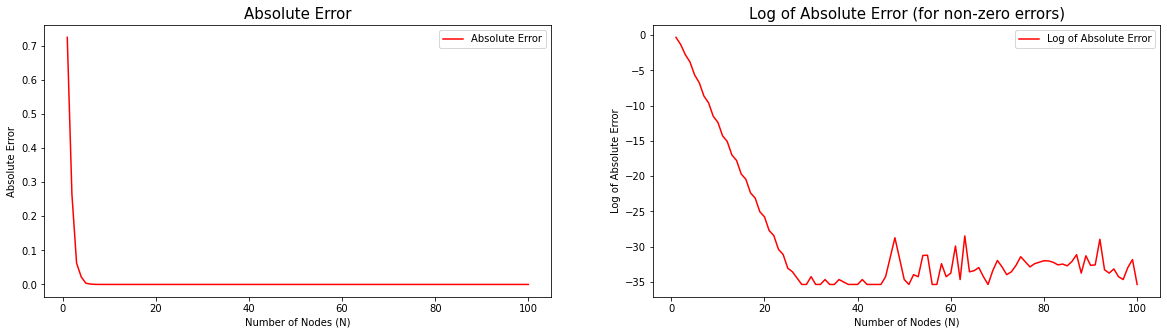

In [10]:
import matplotlib.pyplot as plt

# Set a value of N.
# The accuracy of the quadrature rule will be tested for all values of  N up to and including this value.
N = 100

# Create an array of two empty subplots.
fig, ax = plt.subplots(1, 2, figsize = (20,5))

'''Our first plot will display the absolute error of our quadrature function against each value of N.'''

# Create an x axis covering all values 1 to N.
xaxis1 = np.linspace(1, N, N)

# Create an empty array to store the y values in.
yaxis1 = np.zeros(N)

# Create a for loop that will hit every value of n up to n=N.
for n in range(1, N + 1):

    # We calculate the absolute error for each n using the my_quadrature_error function above.
    yaxis1[n - 1] = my_quadrature_error(exact_integral, a, b, n)

# PLots the absolute error of our quadrature function against each value of N.
ax[0].plot(xaxis1, yaxis1, 'r-', label='Absolute Error')

# We add a legend, title, and axes labels to our first plot.
ax[0].legend()
ax[0].set_title('Absolute Error', fontsize=15)
ax[0].set_xlabel('Number of Nodes (N)')
ax[0].set_ylabel('Absolute Error')

'''Our second plot will display the log of the absolute error against the log of N. 
   We skip any N for which the absolute error is zero as the log of zero is undefined. '''

# Creates an empty vector in which we shall store the log of the non zero errors and the log of the corresponding N values.
xaxis2 = np.empty(0)
yaxis2 = np.empty(0)

# Creates a for loop which will hit every value of N.
for n in range(1, N+1):

    # We create an if loop that will append only the log of non zero errors and their corresponding log N values.
    if my_quadrature_error(exact_integral, a, b, n) !=0:

        # We append these log N values to our xaxis2 array.
        xaxis2 = np.append(xaxis2, n)

        # We append the log of non zero errors to our yaxis 2 array.
        yaxis2 = np.append(yaxis2, np.log(my_quadrature_error(exact_integral, a, b, n)))
        

# PLots the log of the non zero absolute errors of our quadrature function against the log of each corresponding N.
ax[1].plot(xaxis2, yaxis2, 'r-', label='Log of Absolute Error')

# We add a legend, title, and axes labels to our second plot.
ax[1].legend()
ax[1].set_title('Log of Absolute Error (for non-zero errors)', fontsize=15)
ax[1].set_xlabel('Number of Nodes (N)')
ax[1].set_ylabel('Log of Absolute Error')

# Shows the plot.
plt.show()

***📝 Discussion for question 1.4***

For an iterative formula to produce an accurate approximation to a value the error should decrease exponentially with increasing N. The log of an exponential function is linear, thus if we take the log of our error, for a good approximation, we should observe a linearly decreasing plot that tends towards zero.
For values of N up to 27 this is exactly what we observe. However for N = 27 we get an error of 0. This means the error is either 0 or smaller than 1e-323, which is the smallest number python 3.8 can interpret as non-zero. For N >= 27 we observe abnormalities in the log of the error that no longer suggest linearity. However when we look at the plot of the absolute error we see that the error appears to decrease with increasing N. This leads us to expect that the error values for N >= 27 are so small that we experience rounding errors when carrying out our computations.

---
# Question 2: Numerical differentiation [10 marks]


Consider a finite difference approximation 

$$
F' \left( x \right) \approx D \left( x \right) = \frac{1}{\Delta x} \left[ -\frac{1}{8} F \left( x - 2\Delta x \right) -\frac{3}{4} F \left( x \right) + F \left( x + \Delta x \right) - \frac{1}{8} F \left( x + 2 \Delta x \right) \right].
$$

By considering the derivative of the function $F \left( x \right) = \sin x$ at $x = 1$, perform numerical experiments to investigate the accuracy of this approximation. Your code should generate appropriate output and/or figures to illustrate the results.

Confirm your results analytically. (You can either use the Markdown cell below, or submit a PDF of your handwriting if you prefer.)

**[10 marks]**

The slope of the first graph is approximately 2.2662.
Rounded to the nearest integer the slope is of gradient 2.
The log of the error is hence roughly proportional to 2 times the log of the step size, implying that the given approximation is of order of accuracy; 2.
Since the given approximation is of order of accuracy 2 we expect the error to vary roughly with dx to the power 2, which can be seen on our second plot.


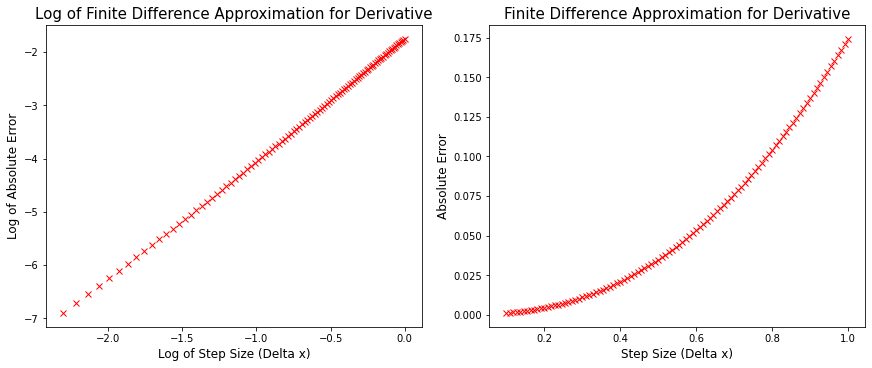

None


In [20]:
# We first define a function which we will use to investigate the accuracy of our finite difference approximation.
def F(x):
    return np.sin(x)
    
# We now create a function for our investigation to allow us to easily edit the inputs if desired.
def accuracy_investigation(x, dx, exactD):

    '''
    The function calculates the error between our finite 
    difference approximation and the accurate value of 
    the derivative.
    
    Inputs:
    x (float): the value at which we comput the derivative and the approximation to the derivative
    dx (numpy array): an array containing different step sizes
    exactD (function of x): the exact derivative of our function F

    Returns:
    Our function does not return anything but will produce a plot of the log of the error against the log of the step size, 
    a plot of how the error varies with step size and printed statements specifying the order of accuracy of our finite 
    difference approximation.


    '''
    # Creates empty vectors in which to store our derivative approximation and error values.
    D = np.zeros(len(dx))
    error = np.zeros(len(dx))

    # Creates a loop that covers ever input value in the array dx.
    for i in range(len(dx)):
        
        # Calculates the finite derivative approximation at x for each dx.
        D[i] = (1 / dx[i]) * (-(1/8) * F(x - 2 * dx[i]) - (3/4) * F(x) + F(x + dx[i]) - (1/8) * F(x + 2 * dx[i]))
        

    # Calculates the absolute error between our approximation and the exact value of the derivative at x, for each dx. 
        error[i] = abs(D[i] - exactD)

    # Creates an empty array of two subplots on which we can display our investigation.
    # We specify the size and layout to make tthe plots clear and easily readable.
    fig, ax = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

    # Plots the log of the error against the log of the step size.
    ax[0].plot(np.log(dx), np.log(error), "rx")
    
    # Sets the title and axes labels for our first plot.
    ax[0].set_title('Log of Finite Difference Approximation for Derivative', fontsize=15)
    ax[0].set_xlabel('Log of Step Size (Delta x)', fontsize=12)
    ax[0].set_ylabel('Log of Absolute Error', fontsize=12)

    # np.polyfit fits a polynomial of degree 1, through our points, returning a vector of its coeffecients
    # we call the [0] coeffectient as for our degree 1 polynomial this is the slope of our log-log plot
    slope = np.polyfit(np.log(dx), np.log(error), 1)[0]

    # We round the gradient of the slope to the nearest integer to roughly determine which power of dx our error varies with.
    order = round(slope)

    # Print the slope of the graph and the order of accuracy of our approximation.
    print(f'The slope of the first graph is approximately {slope:.4f}.')
    print(f'Rounded to the nearest integer the slope is of gradient {order}.')
    print(f'The log of the error is hence roughly proportional to {order} times the log of the step size, implying that the given approximation is of order of accuracy; {order}.')

    # Plots the size of the error against the step size.
    ax[1].plot(dx, error, "rx")
    
    # Sets the title and axes labels for our second plot.
    ax[1].set_title('Finite Difference Approximation for Derivative', fontsize=15)
    ax[1].set_xlabel('Step Size (Delta x)', fontsize=12)
    ax[1].set_ylabel('Absolute Error', fontsize=12)

    # Prints a statement specifying how we expect the size of the error to vary with the step size.
    print(f'Since the given approximation is of order of accuracy {order} we expect the error to vary roughly with dx to the power {order}, which can be seen on our second plot.')

    # Shows the plot
    plt.show()

'''Inputs'''

# The specified inputs, plus my chosen dx.
# Note F is not an input but must be specified as a separate function, which can be called by the accuracy_investigation function.
# F is defined above as F(x) = np.sin(x).
x = 1
dx = np.linspace(0.1, 1, 100) # Here I chose dx to be a hundred different step sizes, varying between 0.1 and 1.
exactD = np.cos(x)

# Print the plot and results.
print(accuracy_investigation(x, dx, exactD))

***📝 Question 2***

---
# Question 3: Root finding [14 marks]

Consider the function

$$
  F \left( x \right) = \ln x - x + 4.
$$

**3.1** Plot the function over the interval $x \in (0, 10]$.

**[2 marks]**

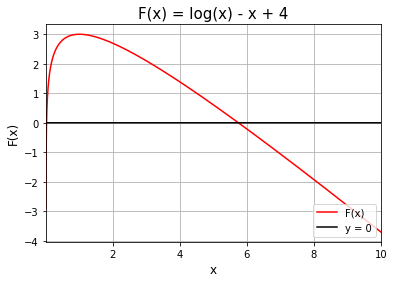

In [12]:
# Defines the function we will plot.
def F(x):
    return np.log(x) - x + 4

# Creates an empty subplot on which we can plot our funtion.
fig, ax = plt.subplots()

# Creates an array of values of x spanning the interval (0,10].
# Note we don't include the value x=0.
x = np.linspace(0, 10, 10000)[1:]

# Plots our function F(x) over the interval x = (0,10].
ax.plot(x, F(x),'r-', label='F(x)')

# Plots the y axis in order to make the rough location of the roots more obvious.
ax.plot(x, np.zeros(x.shape[0]), 'k-', label='y = 0')

# Adds a title, axes labels, legend and gridlines for our plot.
ax.set_title('F(x) = log(x) - x + 4', fontsize=15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('F(x)', fontsize=12)
ax.legend(loc = 'lower right')
ax.grid(True)

# Adjusts the x axis for our specified interval.
ax.set_xlim([x[0], x[-1]])

# Shows the plot.
plt.show()

**3.2** Find the root of $F$ in the interval $[4, 8]$, using 2 different methods: a bracketing method of your choice, and Newton's method.

**[4 marks]**

In [14]:
'''We first approximate the root using the bracketing method; the bisection method.'''

def bisection_method(a, b, error):
    '''
    The function uses the bisection method to find the root of F in a given interval [a,b].

    Inputs:
    a (float): lower bound of the interval
    b (float): upper bound of the interval
    error (float): the allowed error between the root and our approximation

    Returns:
    final_root (float): the final approximation to the root
    error (float): the allowed error between the root and our approximation
     
    '''
    # We first calculate the midpoint of our interval.
    c = 0.5 * (a + b)
    
    # Creates a while loop that will keep approximating the root until we are within the specified error of our root.
    while abs(F(c)) >= error:
        
        # If the root is between a and c or is equal to a or c, [a,c] becomes our new interval.
        if F(a) * F(c) <= 0.0:
            
            # We move the interval to [a,c] by setting the midpoint, c, to be our new upper bound.
            b = c 
        
        # If the root is in the interval [c,b] or is equal to b [c,b] becomes our new interval.
        else:

            # We move the interval to [c,b] by setting the midpoint, c, to be our new lower bound.
            a = c                 

        # Calculates the next midpoint, c.
        c = 0.5 * (a + b)
    
    # Fixes the final approximation of our root.
    final_root = c
    
    # Return the final approximation for our root and its corresponding error.
    # Note we return the error for our final print statement.
    return final_root, error

# Approximates the root for our specified F.
final_root, error = bisection_method(4, 8, 10**(-15))

# Prints a statement including the approximation of the root and its error. 
print(f"Using the bisection method, we approximate the root of our function to be equal to {final_root}, within an error of {error}.")


'''Now we approximate the root using Newton's Method.'''

# Define a function that is the derivative of our above F(x) = np.log(x) - x + 4
def derivative_of_F(x):
    return 1/x - 1

# Define a function that is the iteration function corresponding to Newtons Method, where F(x) = np.log(x) - x + 4.
def G(x):
    return x - F(x)/derivative_of_F(x)

def newtons_method(initial_guess, error):

    '''
    The function approximates the root using an initial guess to within a specified error.

    Inputs:

    initial_guess (float): the initial guessed x value for our root
    error (float): the allowed error between the root and our approximation 

    Returns:

    final_root (float): the final approximation to the root
    error (float): the allowed error between the root and our approximation
    
    '''

    # Sets x to be our initial guess.
    x = initial_guess

    # Calculates the next guess using the Newton iteration function.
    next_guess = G(x)

    # Creates a while loop that will contiue approximating the root until we are within our specified error of the root.
    # Note we keep looping until the next guess, G(x), is within the tolerance, since our loop returns the next guess.
    while abs(G(x) - x) > error:
        
        # Calculates the next guess using the iteration function.
        next_guess = G(x)
        
        # Sets x as our next guess before the loop is repeated.
        x = next_guess
    
    # Sets the variable final_root as our final approximation for clarity.
    final_root = x
    
    # Return the final approximation for our root and its corresponding error.
    # Note we return the error for our final print statement.
    return final_root, error
    
# Approximates the root for a given intial guess, and a corresponding allowed error.
final_root, error = newtons_method(4, 10**(-15))

# Prints a statement including the approximation of the root and its error. 
print(f"Using Newton's Method, we approximate the root of our function to be equal to {final_root}, within an error of {error}.")

Using the bisection method, we approximate the root of our function to be equal to 5.749031386012701, within an error of 1e-15.
Using Newton's Method, we approximate the root of our function to be equal to 5.749031386012701, within an error of 1e-15.


**3.3** Consider a third method to find this root, defined as the fixed-point iteration

$$
  x_n = G \left( x_{n - 1} \right) \textrm{ for } n = 1, 2, \ldots,
$$

with iteration function

$$
  G \left( x \right) = \alpha \left( \ln x - x + 4 \right) + x,
$$

where $\alpha$ is a real parameter to be specified.

Using an initial guess $x_0 = 5$, use this fixed-point iteration to seek the root, considering different values of $\alpha \in \left[ 1, 5 \right]$.

Discuss and explain the convergence properties of this fixed-point iteration. Your code should generate appropriate output and/or figures to illustrate the results and to support your discussion.

You can use the Markdown cell below for discussion, or submit a PDF of your handwriting if you prefer.

**[8 marks]**

Cannot compute log of a negative value, hence cannot compute guess 80 for alpha = 3.0.
Cannot compute log of a negative value, hence cannot compute guess 3 for alpha = 4.0.
Cannot compute log of a negative value, hence cannot compute guess 3 for alpha = 5.0.
The final approximations to our root at approximately [5.74903139] for alpha = [1. 2. 3. 4. 5.], are [ 5.74903139  5.74903139 -1.4067392  -5.27055208 -9.13436495], respectively.
The final approximations for alpha = [1. 2. 3. 4. 5.] are obtained after [18.  2. 79.  2.  2.] iterations, respectively.
However our formula only converges for alpha = [1. 2.].
For these converging values of alpha, alpha = [1. 2.], the final approximation is obtained after [18.  2.] iterations respectively.
Hence our formula converges fastest for alpha = 2.


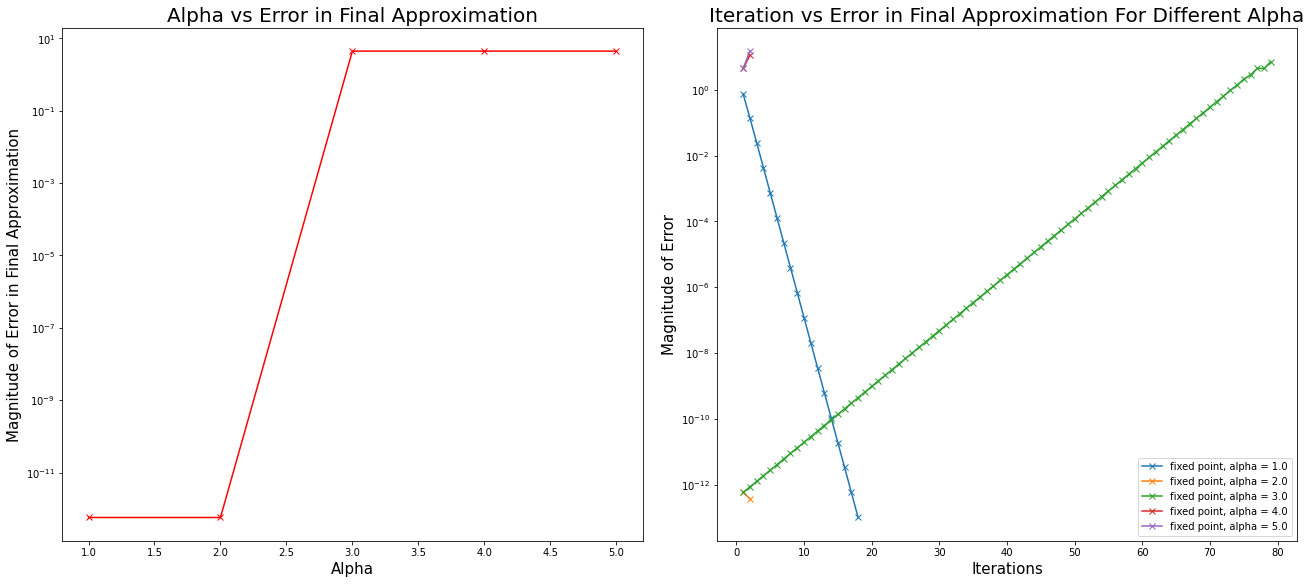

In [18]:
from scipy.optimize import fsolve
%matplotlib inline

# Calculates the "true" value of the root uses the scipy fsolve function.
fsolve_root = fsolve(F, 5, xtol=1.0e-14)

# Defines our iteration function.
def G(x, alpha):
    return alpha * (np.log(x) - x + 4) + x

# Set our initial guess.
x = 5

# Sets alpha.
# We investigate alpha in our specified range (the specific values tested can be easily editied).
upper_limit = 5
lower_limit = 1
number_of_alpha_values = 5
alpha = np.linspace(lower_limit, upper_limit, number_of_alpha_values)

# Set the maximum number of iterations to prevent infinite looping.
max_iterations = 100

# Create empty arrays to store all our values in.
roots = np.empty(0)
error_in_roots = np.empty(0)
converging_alphas = np.empty(0)
number_of_iterations = np.empty(0)
converging_iterations = np.empty(0)

# Create an array of subplots.
fig, ax = plt.subplots(1, 2, figsize = (18, 8), constrained_layout = True)

# Creates a for loop for each alpha.
for a in alpha:
    
    # Calculates the initial error between our initial guess and the fsolve root.
    error_at_i = np.array([abs(x - fsolve_root)])
    
    # Sets the initial value of guesses for each alpha.
    iterations = 1 

    # Loops until convergenge is achieved or the next guess is undefined.
    while True:
        
        # Increments the iteration number.
        iterations += 1
       
        # Calculate the next guess using our iterative formula.
        x_new = G(x, a)
        
        # Append the error at each iteration.
        error_at_i = np.append(error_at_i, abs(x_new-fsolve_root))
        
        # Breaks the loop if the next guess is undefined.
        if x_new <=0:
            
            # Appends the iteration number to our vector for plotting.
            number_of_iterations = np.append(number_of_iterations, iterations)

            # Prints a statement telling reader at which iteration the formula is undefined.
            print(f'Cannot compute log of a negative value, hence cannot compute guess {iterations+1} for alpha = {a}.')
            break
        
        # Breaks the loop when convergence is achieved.
        if abs(x_new - x) < 1.0e-12:
            
            # Appends the iteration number to our vector for plotting.
            number_of_iterations = np.append(number_of_iterations, iterations)

            # Appends the iteration to the separate vector for the converging iterations.
            # This allows us to print a statement about the alpha value with the fastest convergence.
            converging_iterations = np.append(converging_iterations, iterations)

            # Appends the alphas for which the formula converges to our vector.
            # This again allows us to print a statement about the alpha value with the fastest convergence.
            converging_alphas = np.append(converging_alphas, a)
            break

         # Breaks the loop when the iteration number becomes very large.
         # This prevents infinite looping.
        if iterations == max_iterations:

            # Prints statements clarfying lack of convergence.
            print(f'For alpha = {a}, we  reach {max_iterations} iterations without convergence.')
            
            break
            
        # Update the x value for the next iteration.
        x = x_new 
    
    # Appends the final approximation of the root to our roots array for each value of alpha.
    roots = np.append(roots, x_new) 

    # Appends the final error in our approximation of the root to our error array for each value of alpha.
    error_in_roots = np.append(error_in_roots, abs(x-fsolve_root))

    # Plots the error at each iteration for every alpha on our second plot.
    ax[1].plot(np.linspace(1, iterations, iterations), error_at_i, marker="x", label=f'fixed point, alpha = {a}')

# Plots the error in the final approximation against each alpha value.
ax[0].plot(alpha, error_in_roots, color = 'r', marker="x")

# Sets the y scales to logarithmic for our plots.
ax[0].set_yscale("log")
ax[1].set_yscale("log")

# Sets the titles and axes labels for our plots.
ax[0].set_title('Alpha vs Error in Final Approximation', fontsize = 20)
ax[0].set_xlabel('Alpha', fontsize = 15)
ax[0].set_ylabel('Magnitude of Error in Final Approximation', fontsize = 15) 
ax[1].set_title('Iteration vs Error in Final Approximation For Different Alpha', fontsize = 20) 
ax[1].set_xlabel('Iterations', fontsize = 15)
ax[1].set_ylabel('Magnitude of Error', fontsize = 15)

# Adds legend to second plot.
ax[1].legend()

'''We calculate the fastest converging alpha for our final print statement.'''

# Set the current smallest number of iterations (the number for our first alpha value).
minimum = converging_iterations[0]

# Set the initial fastest alpha to be this corresponding first alpha value.
fastest_alpha = alpha[0]

# Loop through each final number of iterations (corresponding to all our alpha values).
for i in range(1, len(converging_alphas+1)): 

    # Set condition to find a smaller final iteration number.
    if converging_iterations[i] < minimum:

        # Set new mimimum at this new smaller iteration number.
        minimum = converging_iterations[i]

        # Set the corresponding new fastest alpha.
        fastest_alpha = i + 1

# Print some final conclusive statements from our investigation.

print(f'The final approximations to our root at approximately {fsolve_root} for alpha = {alpha}, are {roots}, respectively.')
print(f'The final approximations for alpha = {alpha} are obtained after {number_of_iterations} iterations, respectively.')
print(f'However our formula only converges for alpha = {converging_alphas}.')
print(f'For these converging values of alpha, alpha = {converging_alphas}, the final approximation is obtained after {converging_iterations} iterations respectively.')
print(f'Hence our formula converges fastest for alpha = {fastest_alpha}.')

# Show plots.
plt.show()

***📝 Discussion for question 3.3***